# Purpose
<font size="4">We want to use the interpolator to evaluate which filter has the most influence on the photo-z results. Let's define "influence", I, as the change in standard deviation when two different limiting magnitudes are used for a giving filter: one that represents an LSST survey that spent have as much observing time on the filter, and one twice as much time. We can use the interpolator to get these two standard deviations, and then subtract one from the other to calculate the "influence".</font>

In [1]:
# Import what we will need
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import return_pz_stats

# Example
<font size="4">First, as an example, calculate the influence of the u-band filter at a redshift of 0.3, using a baseline set of limiting magnitudes that represent the LSST depth after 2 years. The limiting magnitudes to use are listed in the file "maglims_for_influence.txt" which is in the same directory as this notebook. </font>

In [2]:
# The limiting magnitudes for a baseline survey in filters ugrizy:
mags = np.asarray( [25.212, 26.505, 26.657, 25.957, 25.181, 23.981], dtype='float' )

# The limiting magnitude in u-band if the survey spend half/double the amount of time on u-band:
umag_hlf = 24.835
umag_dbl = 25.588

# Reset the u-band limiting magnitude and get the standard deviation
mags[0] = umag_hlf
results_zbin,results_stats = return_pz_stats.interpolate_statistics( mags, 0.3 )
stddev_hlf = results_stats[0]
del results_zbin,results_stats

# Reset the u-band limiting magnitude and get the standard deviation
mags[0] = umag_dbl
results_zbin,results_stats = return_pz_stats.interpolate_statistics( mags, 0.3 )
stddev_dbl = results_stats[0]
del results_zbin,results_stats

# Calculate the influence
influence = stddev_hlf - stddev_dbl

# Print out the values
print(stddev_hlf,stddev_dbl,influence)

# Delete everything we used in this test cell
del mags, umag_hlf, umag_dbl, stddev_hlf, stddev_dbl, influence

0.0435348209397 0.0415303842656 0.00200443667412


# Initial Plot
<font size="4">Now let's repeat this for the full range of redshifts we consider, and then make a plot.</font>

[ 0.00200444  0.00114133  0.00117873 -0.00011183 -0.00039146 -0.00048076
 -0.00017427 -0.00058473 -0.00058762 -0.0003435   0.00198046  0.00405747
  0.00816679  0.00984078  0.00879688  0.0122404   0.01328522  0.01782758
  0.01591709  0.01345255  0.01799184  0.01431536 -0.01847399 -0.03579068
 -0.02437449 -0.01036544 -0.0094606 ]
[ 0.00200177  0.00113981  0.00117716 -0.00011169 -0.00039094 -0.00048012
 -0.00017404 -0.00058395 -0.00058684 -0.00034304  0.00197783  0.00405209
  0.00815595  0.00982771  0.00878519  0.01222414  0.01326758  0.01780391
  0.01589595  0.01343469  0.01796795  0.01429635 -0.01844946 -0.03574315
 -0.02434212 -0.01035167 -0.00944804]
[ 0.00200444  0.00114133  0.00117873 -0.00011183 -0.00039146 -0.00048076
 -0.00017427 -0.00058473 -0.00058762 -0.0003435   0.00198046  0.00405747
  0.00816679  0.00984078  0.00879688  0.0122404   0.01328522  0.01782758
  0.01591709  0.01345255  0.01799184  0.01431536 -0.01847399 -0.03579068
 -0.02437449 -0.01036544 -0.0094606 ]


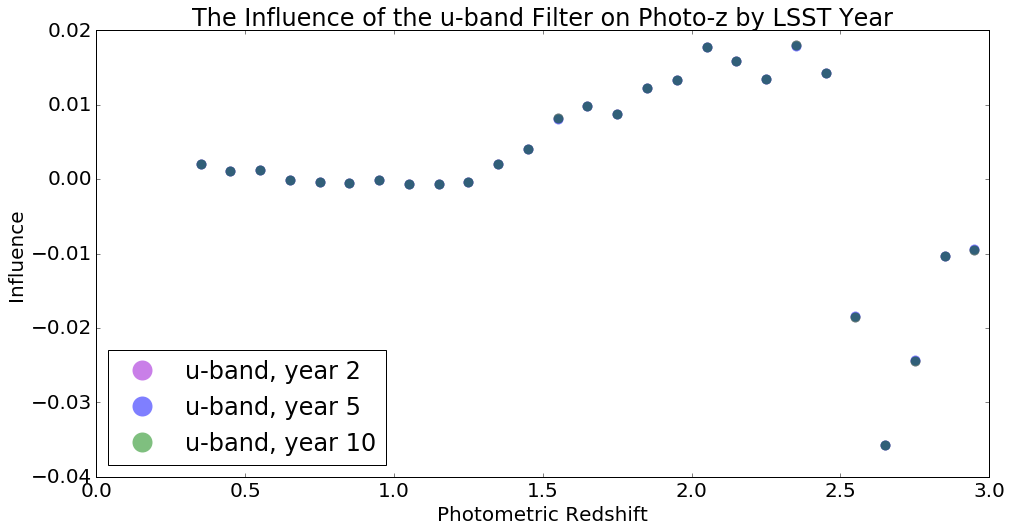

In [9]:
# Make arrays to hold the values we need
redshifts = np.arange( 27, dtype='float' )*0.1 + 0.35
influence_2  = np.zeros( 27, dtype='float' )
influence_5  = np.zeros( 27, dtype='float' )
influence_10 = np.zeros( 27, dtype='float' )
mags_hlf_2  = np.asarray( [24.835, 26.505, 26.657, 25.957, 25.181, 23.981], dtype='float' )
mags_dbl_2  = np.asarray( [25.588, 26.505, 26.657, 25.957, 25.181, 23.981], dtype='float' )
mags_hlf_5  = np.asarray( [25.333, 27.003, 27.155, 26.455, 25.679, 24.479], dtype='float' )
mags_dbl_5  = np.asarray( [26.085, 27.003, 27.155, 26.455, 25.679, 24.479], dtype='float' )
mags_hlf_10 = np.asarray( [25.709, 27.379, 27.531, 26.831, 26.055, 24.855], dtype='float' )
mags_dbl_10 = np.asarray( [26.462, 27.379, 27.531, 26.831, 26.055, 24.855], dtype='float' )

# Loop over the redshifts and calculate the u-band influence
for r,redshift in enumerate(redshifts):
    results_zbin,results_stats = return_pz_stats.interpolate_statistics( mags_hlf_2, redshift )
    stddev_hlf = results_stats[0]
    del results_zbin,results_stats
    results_zbin,results_stats = return_pz_stats.interpolate_statistics( mags_dbl_2, redshift )
    stddev_dbl = results_stats[0]
    del results_zbin,results_stats
    influence_2[r] = stddev_hlf - stddev_dbl
    del stddev_hlf,stddev_dbl
print( influence_2 )

for r,redshift in enumerate(redshifts):
    results_zbin,results_stats = return_pz_stats.interpolate_statistics( mags_hlf_5, redshift )
    stddev_hlf = results_stats[0]
    del results_zbin,results_stats
    results_zbin,results_stats = return_pz_stats.interpolate_statistics( mags_dbl_5, redshift )
    stddev_dbl = results_stats[0]
    del results_zbin,results_stats
    influence_5[r] = stddev_hlf - stddev_dbl
    del stddev_hlf,stddev_dbl
print( influence_5 )

for r,redshift in enumerate(redshifts):
    results_zbin,results_stats = return_pz_stats.interpolate_statistics( mags_hlf_10, redshift )
    stddev_hlf = results_stats[0]
    del results_zbin,results_stats
    results_zbin,results_stats = return_pz_stats.interpolate_statistics( mags_dbl_10, redshift )
    stddev_dbl = results_stats[0]
    del results_zbin,results_stats
    influence_10[r] = stddev_hlf - stddev_dbl
    del stddev_hlf,stddev_dbl
print( influence_10 )

# Make a plot of influence and redshift, and show it
plt.figure(figsize=(16,8))
plt.rcParams.update({'font.size':20})
plt.plot(redshifts, influence_2, 'o', ms=10, alpha=0.5, mew=0, color='darkviolet', label='u-band, year 2')
plt.plot(redshifts, influence_5, 'o', ms=10, alpha=0.5, mew=0, color='blue', label='u-band, year 5')
plt.plot(redshifts, influence_10, 'o', ms=10, alpha=0.5, mew=0, color='green', label='u-band, year 10')
plt.xlabel('Photometric Redshift')
plt.ylabel('Influence')
plt.title('The Influence of the u-band Filter on Photo-z by LSST Year')
plt.legend(loc='lower left',numpoints=1,markerscale=2)
plt.show()

# Clean up after ourselves and delete what is no longer needed
del influence_2, influence_5, influence_10, redshifts
del mags_hlf_2, mags_dbl_2, mags_hlf_5, mags_dbl_5, mags_hlf_10, mags_dbl_10

# Tasks
<font size="4">First, consider what the plot is telling us so far, just about u-band, and what it means for the influence to be a positive number vs. a negative number. Then, add the influences for filtrs grizy to the plot above. Remember that you will need the values for the limiting magnitudes that are in the file "maglims_for_influence.txt" which are in this directory. After that, make two additional plots of the influence vs. redshift for all six filters ugrizy, but for LSST years 5 and 10. </font>